In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data=np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:]/255


data_train=data[0:].T
Y_train = data_train[0]
X_train = data_train[1:]/255



In [ ]:
def init_params():
    W1=np.random.rand(40,784) -0.5
    b1=np.random.rand(40,1) - 0.5
    W2=np.random.rand(10, 40) - 0.5
    b2=np.random.rand(10,1) - 0.5
    return W1,W2,b1,b2


def ReLU(Z):
    return np.maximum(Z,0)

def softmax(z):
    A = np.exp(z)/ sum(np.exp(z))
    return A

def forward_prop(W1,W2,b1,b2,X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1,Z2,A1,A2

def deriv_ReLU(X):
    return X>0

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1,Z2,A1,A2,W1,W2,X,Y):
    one_hot_Y=one_hot(Y)
    m=X.shape[1]
    dZ2=A2-one_hot_Y
    dW2=(1/m)*dZ2.dot(A1.T)
    db2=(1/m)* np.sum(dZ2)

    dZ1= W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1= (1/m)*dZ1.dot(X.T)
    db1 = (1/m)* np.sum(dZ1)

    return dW1, dW2, db1, db2

def update_params(dW1,dW2,db1,db2,W1,W2,b1,b2, lr):
    W1=W1-lr*dW1
    W2=W2-lr*dW2
    b1=b1-lr*db1
    b2=b2-lr*db2
    return W1, W2, b1, b2 

    

In [17]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, lr, epochs):
    W1, W2, b1, b2 = init_params()

    for i in range(epochs):
        Z1, Z2, A1, A2 = forward_prop(W1, W2, b1, b2, X)
        dW1,dW2,db1,db2 = backward_prop(Z1,Z2,A1,A2,W1,W2,X,Y)
        W1,W2,b1,b2= update_params(dW1,dW2,db1,db2,W1,W2,b1,b2,lr)

        if i%50 == 0:
            print("======Iteration :",i,"======= \n")
            predictions= get_predictions(A2)
            print(get_accuracy(predictions,Y))
    return W1,W2,b1,b2 

In [18]:
W1, W2, b1, b2 = gradient_descent(X_train,Y_train, 0.10, 1750)

======Iteration : 0 ======= 

[2 4 4 ... 4 9 9] [4 9 6 ... 7 0 5]
0.07859523809523809
======Iteration : 50 ======= 

[6 4 2 ... 7 8 5] [4 9 6 ... 7 0 5]
0.47309523809523807
======Iteration : 100 ======= 

[4 4 2 ... 7 0 5] [4 9 6 ... 7 0 5]
0.6619285714285714
======Iteration : 150 ======= 

[4 4 6 ... 7 0 5] [4 9 6 ... 7 0 5]
0.7330714285714286
======Iteration : 200 ======= 

[4 4 6 ... 7 0 5] [4 9 6 ... 7 0 5]
0.7724047619047619
======Iteration : 250 ======= 

[4 4 6 ... 7 0 5] [4 9 6 ... 7 0 5]
0.7976666666666666
======Iteration : 300 ======= 

[4 9 6 ... 7 0 5] [4 9 6 ... 7 0 5]
0.8145714285714286
======Iteration : 350 ======= 

[4 9 6 ... 7 0 5] [4 9 6 ... 7 0 5]
0.828
======Iteration : 400 ======= 

[4 9 6 ... 7 0 5] [4 9 6 ... 7 0 5]
0.8391190476190477
======Iteration : 450 ======= 

[4 9 6 ... 7 0 5] [4 9 6 ... 7 0 5]
0.8466666666666667
======Iteration : 500 ======= 

[4 9 6 ... 7 0 5] [4 9 6 ... 7 0 5]
0.8539285714285715
======Iteration : 550 ======= 

[4 9 6 ... 7 0 5] [4 9 6 

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


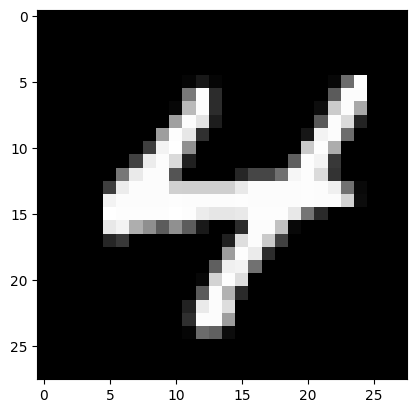

Prediction:  [6]
Label:  6


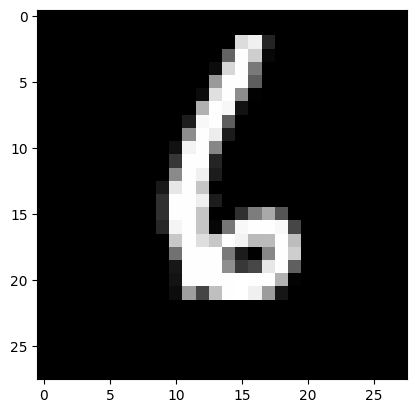

Prediction:  [4]
Label:  4


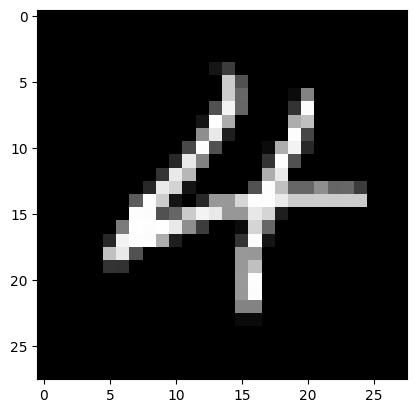

Prediction:  [9]
Label:  9


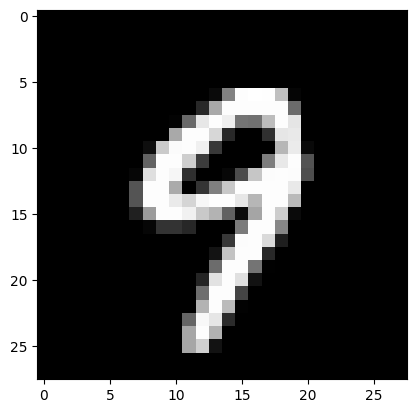

Prediction:  [4]
Label:  4


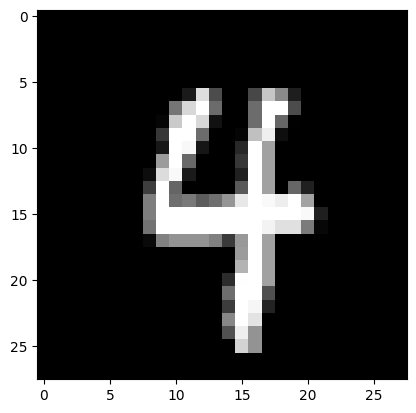

Prediction:  [9]
Label:  9


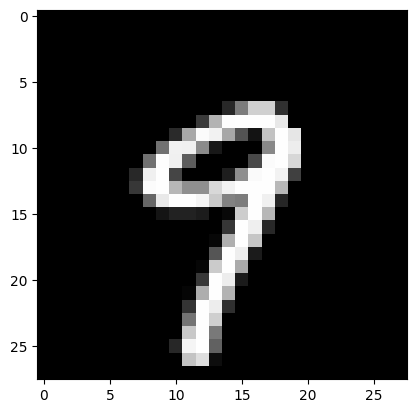

Prediction:  [4]
Label:  4


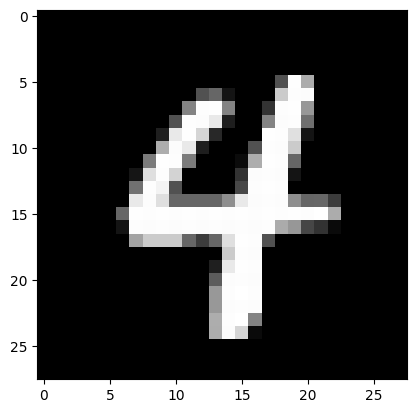

Prediction:  [7]
Label:  7


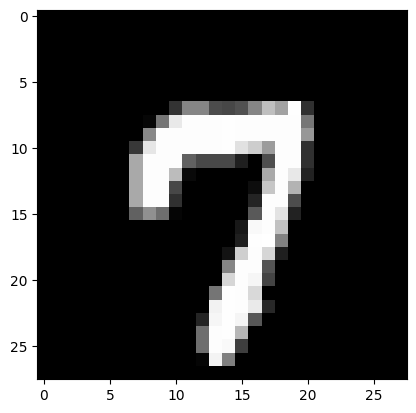

Prediction:  [0]
Label:  0


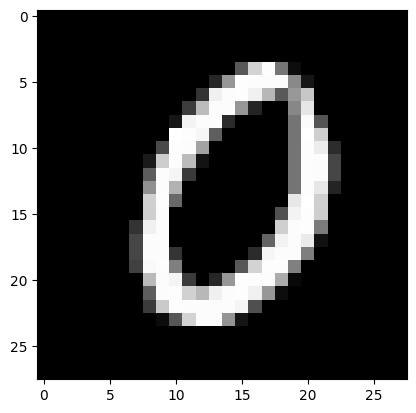

Prediction:  [7]
Label:  9


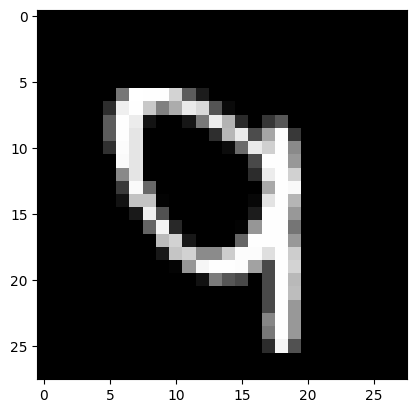

In [28]:
    for i in range(10):
        test_prediction(np.random.randint(1,100), W1,W2, b1, b2)
    #test_prediction(11, W1, W2, b1, b2)
    #test_prediction(22, W1, W2, b1, b2)
    #test_prediction(33, W1, W2, b1, b2)